In [ ]:
import pandas as pd

# Загрузка данных о курсе валют (пример)
data = pd.read_csv('currency_exchange.csv', parse_dates=['Date'], index_col='Date')
# Отбор признаков и целевой переменной
X = data[['Interest_Rate', 'GDP_Growth']]
y = data['Exchange_Rate']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('economic_data.csv', parse_dates=['Date'], index_col='Date')

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Проверка стационарности
result = adfuller(data['Value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

In [ ]:
data_diff = data.diff().dropna()

In [ ]:
from pmdarima import auto_arima

model = auto_arima(series, start_p=1, start_q=1, max_p=5, max_q=5, seasonal=False, trace=True)
print(model.summary())

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Построение модели
model = ARIMA(data['Value'], order=(p, d, q))
model_fit = model.fit()

# Результаты модели
print(model_fit.summary())

In [ ]:
# Прогнозирование
forecast = model_fit.forecast(steps=10)
print(forecast)

# Оценка модели (например, с использованием MSE)
mse = mean_squared_error(data_test, forecast)
print(f'MSE: {mse}')

C:\Users\Maxim\AppData\Local\Temp\ipykernel_14484\2218971520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


Среднеквадратичное отклонение: 2311.696294772026 


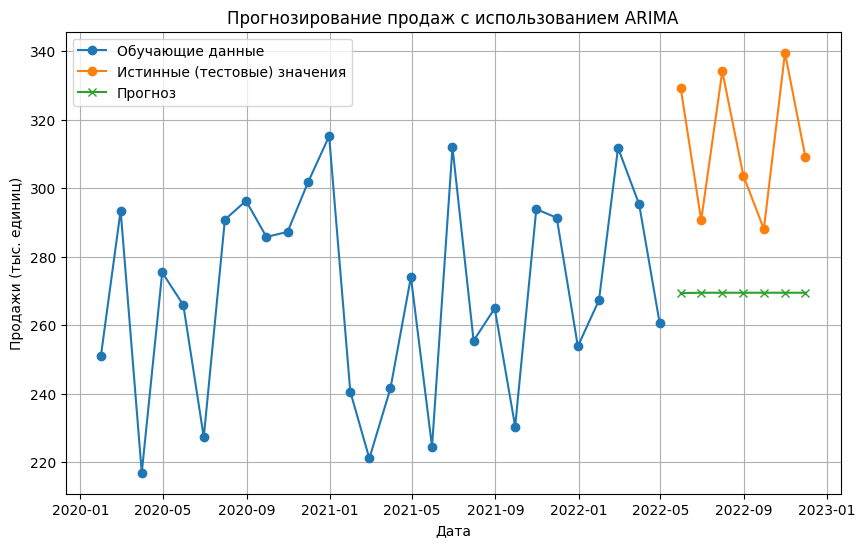

In [7]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Шаг 1: Загрузка данных
# Генерация примерных данных о продажах (в тыс. единицах)
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2022-12-01', freq='M')
sales_data = np.random.randint(200, 300, size=(len(date_rng))) + np.linspace(0, 50, len(date_rng))
df = pd.DataFrame(sales_data, index=date_rng, columns=['Sales'])

# Шаг 2: Разделение данных на тренировочные и тестовые выборки
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Шаг 3: Построение модели ARIMA
# Используем параметры (p=1, d=1, q=1)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Прогнозирование
predictions = model_fit.forecast(steps=len(test))
test['Predictions'] = predictions

# Оценка качества модели
mse = mean_squared_error(test['Sales'], test['Predictions'])
print(f'Среднеквадратичное отклонение: {mse} ')

# Шаг 4: Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(train, label='Обучающие данные', marker='o')
plt.plot(test['Sales'], label='Истинные (тестовые) значения', marker='o')
plt.plot(test['Predictions'], label='Прогноз', marker='x')
plt.title('Прогнозирование продаж с использованием ARIMA')
plt.xlabel('Дата')
plt.ylabel('Продажи (тыс. единиц)')
plt.legend()
plt.grid(True)
plt.show()


D:\Python 387\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python 387\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python 387\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python 387\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


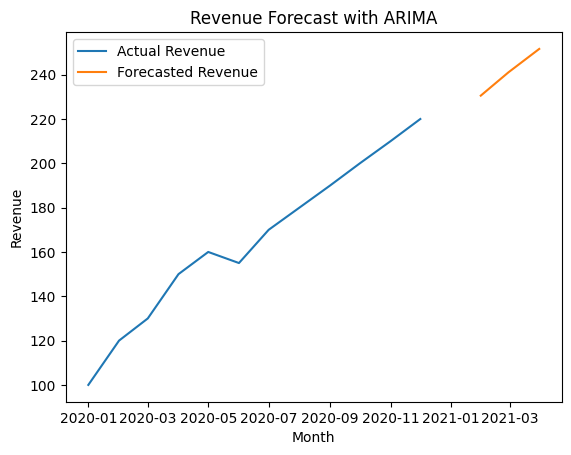

In [5]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Пример данных (условные ежемесячные доходы компании)
data = {
    'Month': ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
              '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
    'Revenue': [100, 120, 130, 150, 160, 155, 170, 180, 190, 200, 210, 220]
}

# Преобразование данных в DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Построение и обучение модели ARIMA
model = ARIMA(df['Revenue'], order=(1, 1, 1))  # (p, d, q) = (1, 1, 1)
model_fit = model.fit()

# Прогнозирование
forecast = model_fit.forecast(steps=3)

# Визуализация результатов
plt.plot(df.index, df['Revenue'], label='Actual Revenue')
plt.plot(pd.date_range(start=df.index[-1], periods=4, freq='M')[1:], forecast, label='Forecasted Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue Forecast with ARIMA')
plt.legend()
plt.show()
